# Umiverse Machine mass functions


* SMF of the new UM when considering in-situ, ex-situ, and the sum of both compared to Songs SMF
* look at the scatter in M* and Mhalo
- for in-situ
- for in-situ + ex-situ
- for N most massive galaxies

In [35]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Local libs
import plots
import cluster_sum
from importlib import reload # for when I mess up local libs

In [2]:
datadir = "/home/christopher/data/universe_machine/"
catalog_file = "sfr_catalog_insitu_exsitu_0.712400_final.npz"

catalog = np.load(datadir + catalog_file)
centrals = catalog["centrals"]
satellites = catalog["satellites"]

# Our data

Let's get a very broad sense of our data

In [3]:
print(centrals.dtype)
print(len(centrals))
print(len(satellites))

[('ID', '<i8'), ('uparent_ID', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('mp', '<f8'), ('sm', '<f8'), ('icl', '<f8'), ('sfr', '<f8')]
385125
10809469


385117 centrals without ICL of our 385125 samples


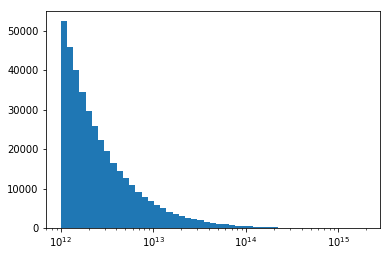

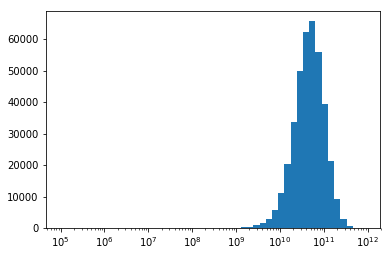

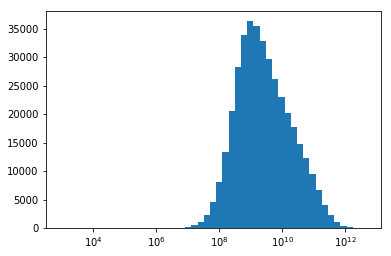

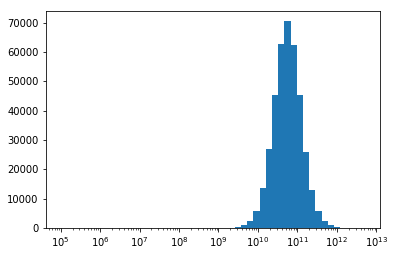

In [4]:
fig, ax = plt.subplots()
_ = ax.hist(centrals["mp"], bins = np.geomspace(np.amin(centrals["mp"]), np.amax(centrals["mp"]), 50))
_ = ax.set(xscale="log")

fig, ax = plt.subplots()
_ = ax.hist(centrals["sm"], bins = np.geomspace(np.amin(centrals["sm"]), np.amax(centrals["sm"]), 50))
_ = ax.set(xscale="log")

fcentrals = centrals[np.nonzero(centrals["icl"])[0]]
fig, ax = plt.subplots()
_ = ax.hist(fcentrals["icl"], bins = np.geomspace(np.amin(fcentrals["icl"]), np.amax(fcentrals["icl"]), 50))
_ = ax.set(xscale="log")
print(
    "{} centrals without ICL of our {} samples".format(len(np.nonzero(centrals["icl"])[0]), len(centrals))
)

fig, ax = plt.subplots()
_ = ax.hist(
    centrals["icl"] + centrals["sm"],
    bins = np.geomspace(
        np.amin(centrals["icl"]) + np.amin(centrals["sm"]),
        np.amax(centrals["icl"]) + np.amax(centrals["sm"]),
        50))
_ = ax.set(xscale="log")

# SMHM relations

Now let's plot the SM, halo mass relations for centrals

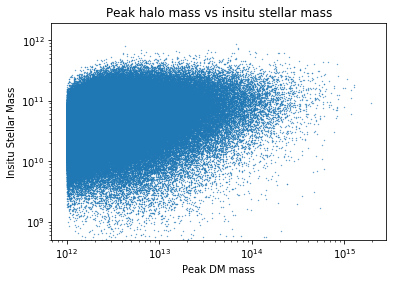

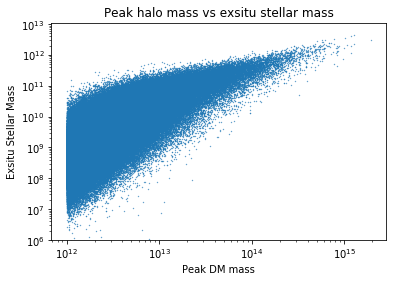

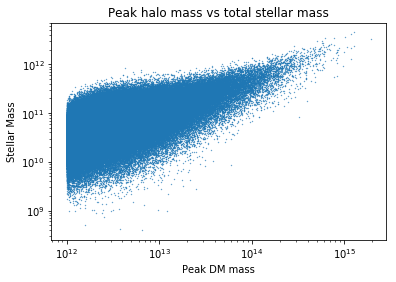

In [5]:
ax = plots.dm_vs_insitu(centrals)
ax.set(ylim=5e8) # ignore crazy small galaxies

ax = plots.dm_vs_exsitu(centrals)
ax.set(ylim=1e6) # not sure why by default it ignores a bunch of data

plots.dm_vs_all_sm(centrals)

# SMHM for cluster

What happens if we start to plot this relation for multiple members of the cluster?

In [7]:
new_centrals = cluster_sum.centrals_with_satellites(centrals, satellites, 1)

[(1000000000.0, 100000000000000.0), (1000000000000.0, 1e+16)]

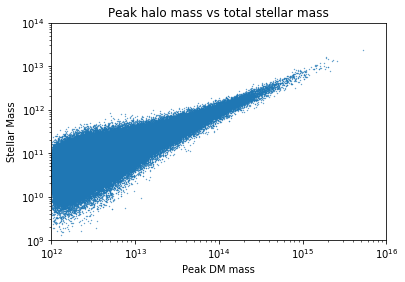

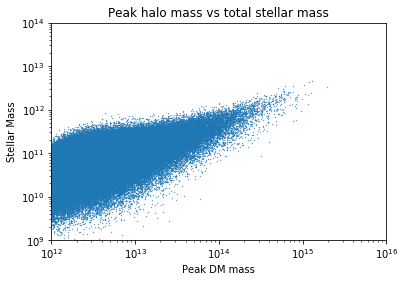

In [60]:
reload(plots)
ax = plots.dm_vs_all_sm(new_centrals)
ax.set(xlim=[1e12, 1e16], ylim=[1e9, 1e14])
ax = plots.dm_vs_all_sm(centrals)
ax.set(xlim=[1e12, 1e16], ylim=[1e9, 1e14])

# Plotly

Lets make some sick plotly graphs.

Notice we need to downsample. Tradeoff for sickness is apparently poor performance.

In [42]:
reload(cluster_sum)
data = [centrals] + [cluster_sum.centrals_with_satellites(centrals, satellites, i) for i in range(1, 10)]

In [61]:
# Downsample to ~ 1000 random points
data = np.array(data)
np.random.seed(2) # reproducibility
mask = np.unique(np.random.randint(0, data.shape[1], 1000))
data = data[:,mask]

In [62]:
scatters = [
    go.Scatter(
        visible = False,
        x = data[i]["mp"],
        y = data[i]["icl"] + data[i]["sm"],
        mode = 'markers',
    ) for i in range(len(data))
]
scatters[0]["visible"] = True

In [63]:
steps = []
for i in range(len(data)):
    steps.append({"method": "restyle", "args": ["visible", [i == j for j in range(len(data))]]})
sliders = [{"active": 0, "steps": steps}]

layout = go.Layout(
    xaxis=dict(
        type='log',
        range=[11.9, 14]
    ),
    yaxis=dict(
        type='log',
        range=[8, 12]
    ),
    sliders=sliders,
)

py.iplot(go.Figure(data=scatters, layout=layout), filename='basic-scatter')